In [1]:
rm(list=ls())

In [2]:
library(ggplot2)

#Exercise 1

In order to plot the triangular distribution I define a function using
the expression given by the system.

In [3]:
a<-0
b<-1
c<-1/3

In [4]:
tri_pdf<-function(x,a,b,c) {
  
  out<-c()
  
  if(c<a || c>b){
    cat("error")
    out<-NA
    
  } else {
    
    for (i in 1:length(x)) {
    
      if (x[i]>=a && x[i]<c){
      
        p<-2*(x[i]-a)/((b-a)*(c-a))
      
      } else if (x[i]>=c && x[i]<=b) {
      
        p<-2*(b-x[i])/((b-a)*(b-c))
      
      } else {
      
        p<-0
      
      }
    
      out<-append(out,p)
    
  }
    
    
  }
  
 return(out) 
  
}

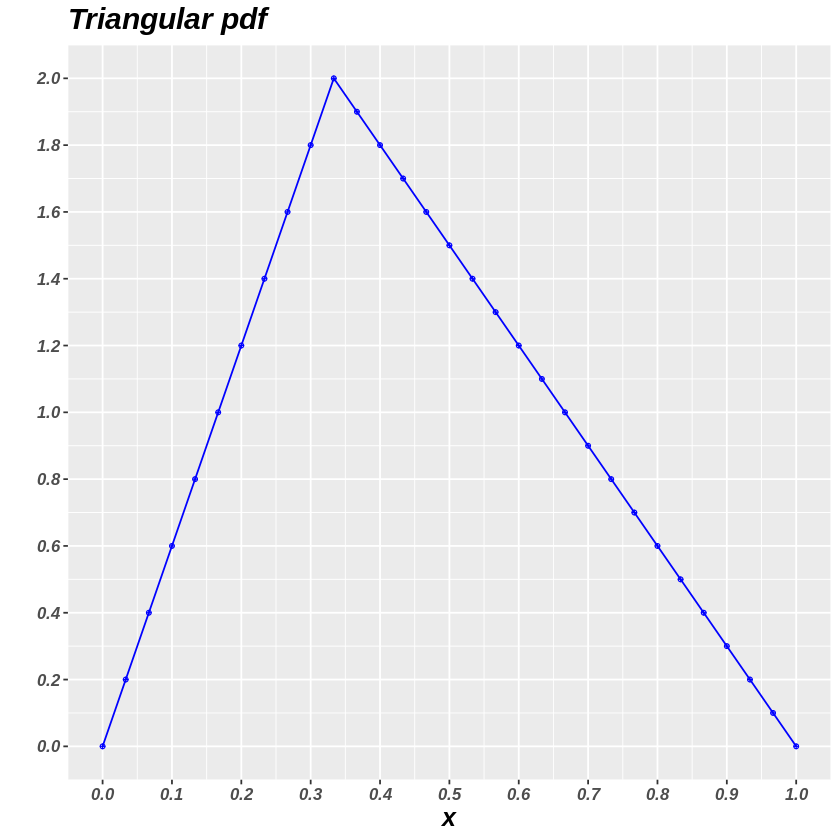

In [5]:
x <- seq(a,b,length.out=31)

ggplot(data = data.frame(x=x,y=tri_pdf(x,a,b,c)),aes(x = x, y=y))+geom_line(aes(x,y),col="blue")+geom_point(col='blue',size=1,shape=10)+ylab(' ')+ggtitle('Triangular pdf')+scale_x_continuous(breaks=seq(0,1, 0.1))+scale_y_continuous(breaks=seq(0,2, 0.2))+theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=15)) #plot

In order to generate random samples following the defined traingular pdf
I define a function with the expression of the quantile function. Than I
generate the samples using the inverse cdf method. For completeness I
define also the cdf function. The expressions of the functions are the
following.

CDF:

-   0 if x\<=a
-   ((x-a)^2)/((b-a)(c-a)) if a\<x\<=c
-   1-((b-x)^2)/((b-a)(b-c)) if c\<x\<b
-   1 if b\<=c

QDF:

for F(c)=(c-a)/(b-a)

-   a+sqrt(x(b-a)(c-a)) if 0\<x\<F(c)
-   b-sqrt((1-x)(b-a)(b-c)) if F(c)\<=x\<1

In [6]:
tri_cdf<-function(x,a,b,c) {
  
  out<-c()
  
  if(c<a || c>b){
    cat("error")
    out<-NA
    
  } else {
    
    for (i in 1:length(x)) {
    
      if (x[i]>=a && x[i]<c){
      
        p<-((x[i]-a)^2)/((b-a)*(c-a))
      
      } else if (x[i]>=b && x[i]<=c) {
      
        p<-1-((b-x[i])^2)/((b-a)*(b-c))
      
      } else if(x[i]>=b) {
      
        p<-1
      
      } else {
      
        p<-0
      }
    
      out<-append(out,p)
    
    }
    
  }
  
 return(out) 
  
}

In [7]:
tri_qdf<-function(x,a,b,c) {
  
  out<-c()
  
  if(c<a || c>b){
    cat("error")
    out<-NA
    
  } else {
    
    F_c<-(c-a)/(b-a)
    
    for (i in 1:length(x)) {
      
      if (x[i]>0 && x[i]<F_c){
        
        q<-a+sqrt(x[i]*(b-a)*(c-a))
      
      } else if (x[i]>=F_c && x[i]<1) {
      
        q<-b-sqrt((1-x[i])*(b-a)*(b-c))
      
      } 
      
      out<-append(out,q)
    
    }
  
  }
  
  return(out) 
  
}

In [8]:
tri_rand<-function(n,a,b,c) {
  
  var<-runif(n)
  out<-tri_qdf(var,a,b,c)
  
  return(out)
}

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



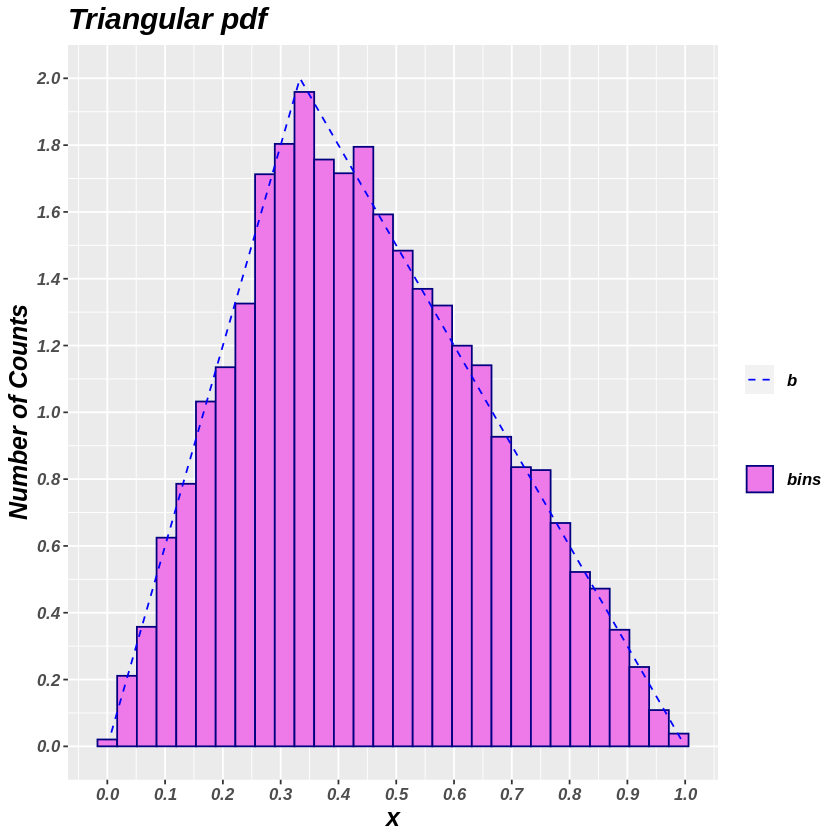

In [9]:
sample<-tri_rand(10000,a,b,c)


ggplot(data.frame(x=sample),aes(x))+
  geom_histogram(aes(y = ..density..,fill='bins'),col='navy')+
  xlim(a,b)+
  geom_line(data = data.frame(x=sample,y=tri_pdf(sample,a,b,c)),aes(x = x, y=y, colour="b"), linetype="dashed")+
  ylab('Number of Counts')+
  ggtitle('Triangular pdf')+
  scale_x_continuous(breaks=seq(0,1, 0.1))+
  scale_y_continuous(breaks=seq(0,2, 0.2))+
  scale_fill_manual(name="",values=c("bins" = "orchid2"))+
  scale_colour_manual(name="",values=c("b" = "blue"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=15), legend.text = element_text(face="bold.italic",size = 10))

#Exercise 2

In order to demonstrate the Markov’s inequality for each of the
distributions I follow this procedure: 1) I define a vector of values
for k 2) I calculate for each value of k the expression P(x\>=k) and put
them in a vector 3) define a function of k to calculate E\[x\]/k 4) plot
the results

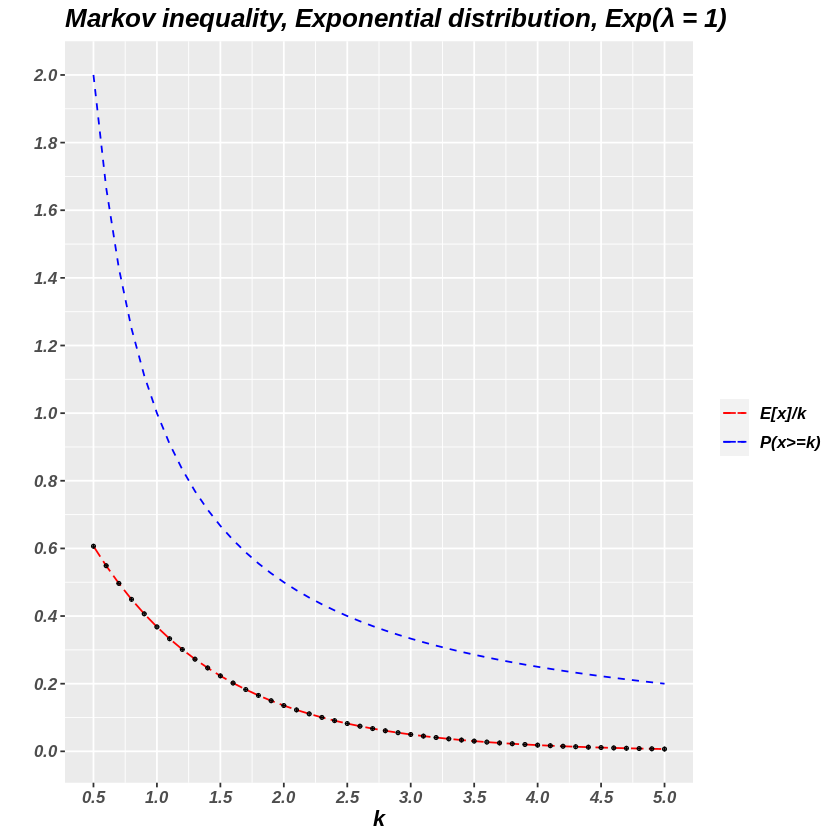

In [10]:
k<-seq(0.5,5,0.1)

rate<-1
p_vector<-c()

for (i in 1:length(k)) {
  p<-pexp(k[i],rate=rate,lower.tail = FALSE )
  p_vector<-append(p_vector,p)
}

markov_max<-function(k,ev=(1/rate)) (ev/(k))

ggplot(,aes(k,p_vector))+
  geom_line(data = data.frame(x=k,y=p_vector),aes(x = x, y=y,colour="E[x]/k"),linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=markov_max(k)),aes(x = x, y=y,colour="P(x>=k)"), linetype="dashed")+
  ggtitle('Markov inequality, Exponential distribution, Exp(λ = 1)')+
  scale_x_continuous(breaks=seq(0,6, 0.5))+
  scale_y_continuous(name="",breaks=seq(0,4, 0.2),)+
  scale_colour_manual(name="",values=c("E[x]/k" = "red", "P(x>=k)"="blue"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=13), legend.text = element_text(face="bold.italic",size = 10))

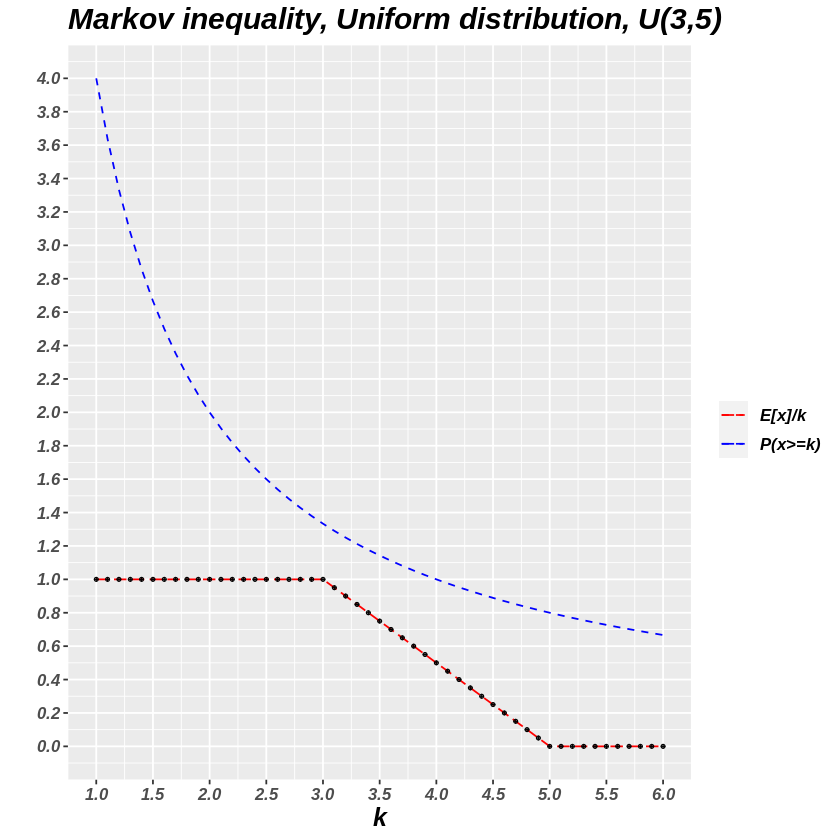

In [11]:
k<-seq(1,6,0.1)

min<-3
max<-5

p_vector<-c()

for (i in 1:length(k)) {
  p<-punif(k[i],min=min,max=max, lower.tail = FALSE)
  p_vector<-append(p_vector,p)
}

markov_max<-function(k,a,b) ((a+b)/2)*(1/(k))

ggplot(,aes(k,p_vector))+
  geom_line(data = data.frame(x=k,y=p_vector),aes(x = x, y=y,colour="E[x]/k"),linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=markov_max(k,min,max)),aes(x = x, y=y,colour="P(x>=k)"), linetype="dashed")+
  ggtitle('Markov inequality, Uniform distribution, U(3,5)')+
  scale_x_continuous(breaks=seq(0,6, 0.5))+
  scale_y_continuous(name="",breaks=seq(0,4, 0.2),)+
  scale_colour_manual(name="",values=c("E[x]/k" = "red", "P(x>=k)"="blue"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=15), legend.text = element_text(face="bold.italic",size = 10))

[1] 1


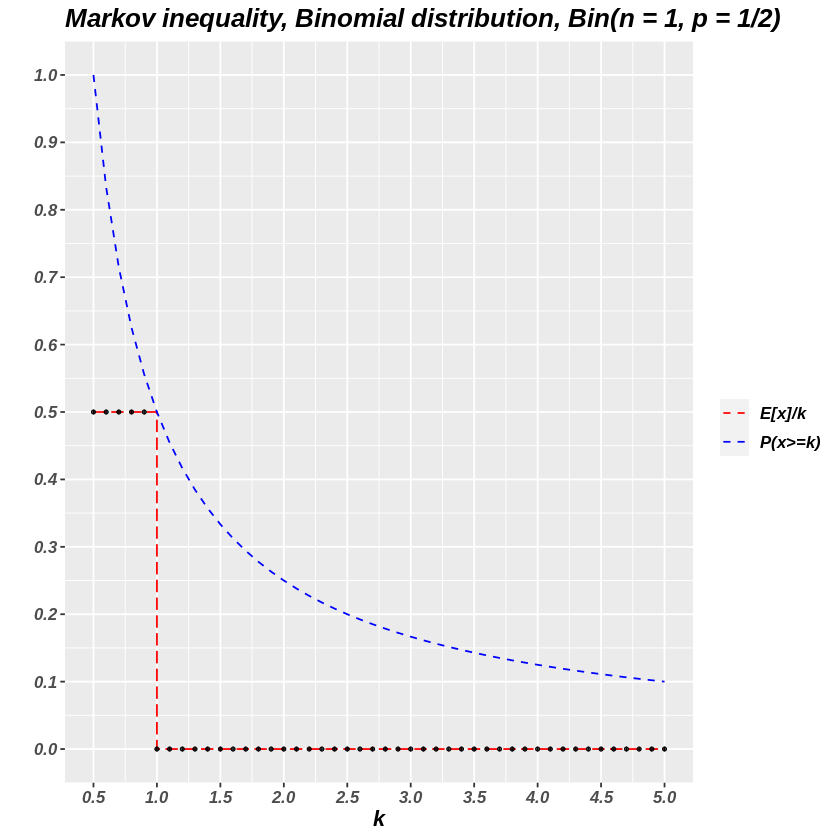

In [12]:
k<-seq(0.5,5,0.1)

n<-1
p<-1/2

p_vector<-c()

for (i in 1:length(k)) {
  p<-pbinom(k[i],size=n,prob=1/2,lower.tail = FALSE)
  p_vector<-append(p_vector,p)
}

p<-1/2

markov_max<-function(x,n,p) n*p/x
print(markov_max(0.5,1,1/2))

ggplot(,aes(k,p_vector))+
  geom_step(data = data.frame(x=k,y=p_vector),aes(x = x, y=y),col="red", linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=markov_max(k,n,p)),aes(x = x, y=y,colour="P(x>=k)"), linetype="dashed")+
  ggtitle('Markov inequality, Binomial distribution, Bin(n = 1, p = 1/2)')+
  scale_x_continuous(breaks=seq(0,5,0.5))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("E[x]/k" = "red", "P(x>=k)"="blue"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=13), legend.text = element_text(face="bold.italic",size = 10))

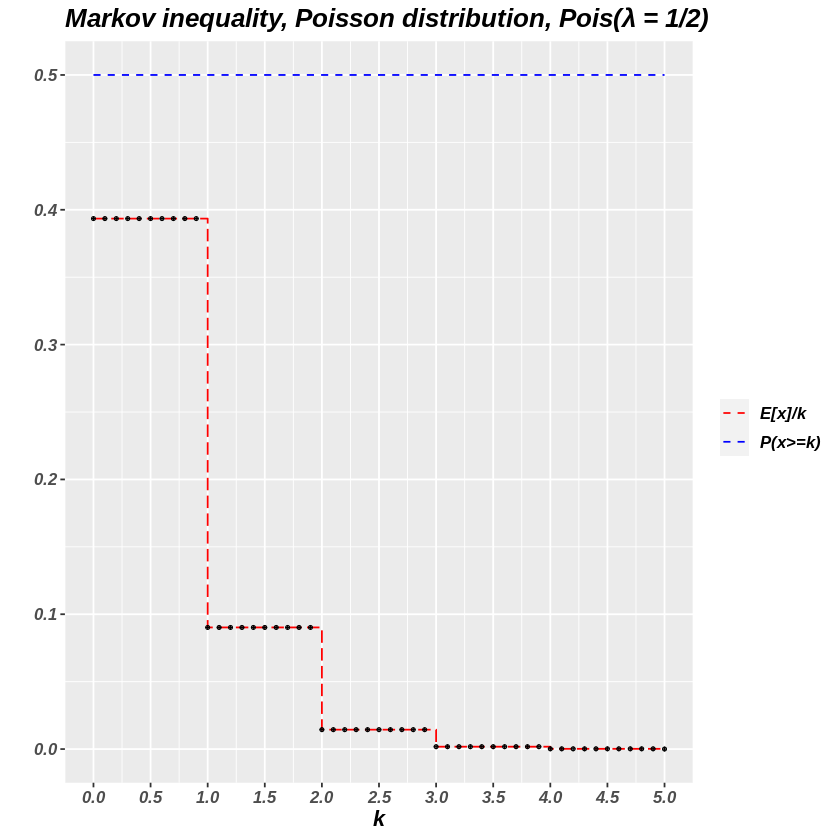

In [13]:
k<-seq(0,5,0.1)

rate<-1/2

p_vector<-c()

for (i in 1:length(k)) {
  p<-ppois(q=k[i],lambda=rate,lower.tail = FALSE)
  p_vector<-append(p_vector,p)
}

markov_max<-function(x,rate) rate

ggplot(,aes(k,p_vector))+
  geom_step(data = data.frame(x=k,y=p_vector),aes(x = x, y=y),col="red", linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=markov_max(k,rate)),aes(x = x, y=y,colour="P(x>=k)"), linetype="dashed")+
  ggtitle('Markov inequality, Poisson distribution, Pois(λ = 1/2)')+
  scale_x_continuous(breaks=seq(0,5,0.5))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("E[x]/k" = "red", "P(x>=k)"="blue"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=13), legend.text = element_text(face="bold.italic",size = 10))

#Exercise 3

In order to demonstrate the Chebyshev’s inequality for each of the
distributions I follow this procedure: 1) I define a vector of values
for k 2) I calculate for each value of k the expression P(\|X−μ\|\<kσ)
and put them in a vector 3) define a function of k to calculate 1−1/k^2
4) plot the results

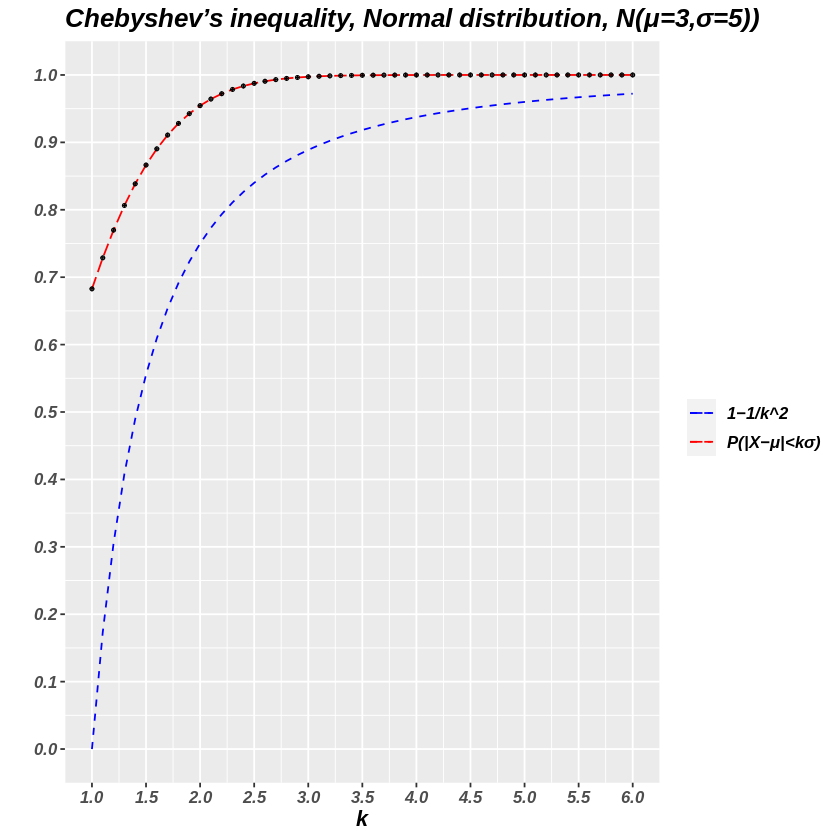

In [14]:
mu<-3
sig<-5

k<-seq(1,6,0.1)

p_vector<-c()

for (i in 1:length(k)) {
  p<-pnorm(k[i]*sig+mu,mean=mu, sd=sig)-pnorm(-k[i]*sig+mu,mean=mu, sd=sig)
  p_vector<-append(p_vector,p)
}

chabyshev_inf<-function(k) (1-1/(k*k))

ggplot(,aes(k,p_vector))+
  geom_line(data = data.frame(x=k,y=p_vector),aes(x = x, y=y, colour="P(|X−μ|<kσ)"), linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=chabyshev_inf(k)),aes(x = x, y=y,colour="1−1/k^2"), linetype="dashed")+
  ggtitle('Chebyshev’s inequality, Normal distribution, N(μ=3,σ=5))')+
  scale_x_continuous(breaks=seq(0.5,6,0.5))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("1−1/k^2" = "blue", "P(|X−μ|<kσ)"="red"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=13), legend.text = element_text(face="bold.italic",size = 10))

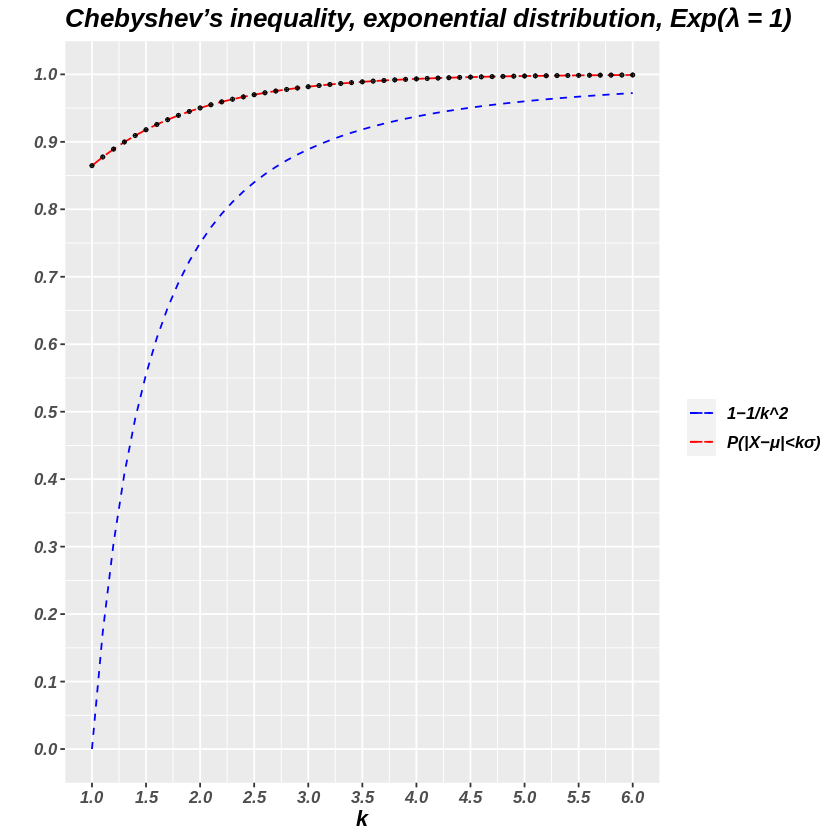

In [15]:
lambda<-1
mu<-1/lambda
sig<-1/lambda

k<-seq(1,6,0.1)

p_vector<-c()

for (i in 1:length(k)) {
  p<-pexp(k[i]*sig+mu,rate=lambda)-pexp(-k[i]*sig+mu,rate=lambda)
  p_vector<-append(p_vector,p)
}

chabyshev_inf<-function(k) (1-1/(k*k))

ggplot(,aes(k,p_vector))+
  geom_line(data = data.frame(x=k,y=p_vector),aes(x = x, y=y, colour="P(|X−μ|<kσ)"), linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=chabyshev_inf(k)),aes(x = x, y=y,colour="1−1/k^2"), linetype="dashed")+
  ggtitle('Chebyshev’s inequality, exponential distribution, Exp(λ = 1)')+
  scale_x_continuous(breaks=seq(0.5,6,0.5))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("1−1/k^2" = "blue", "P(|X−μ|<kσ)"="red"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=13), legend.text = element_text(face="bold.italic",size = 10))

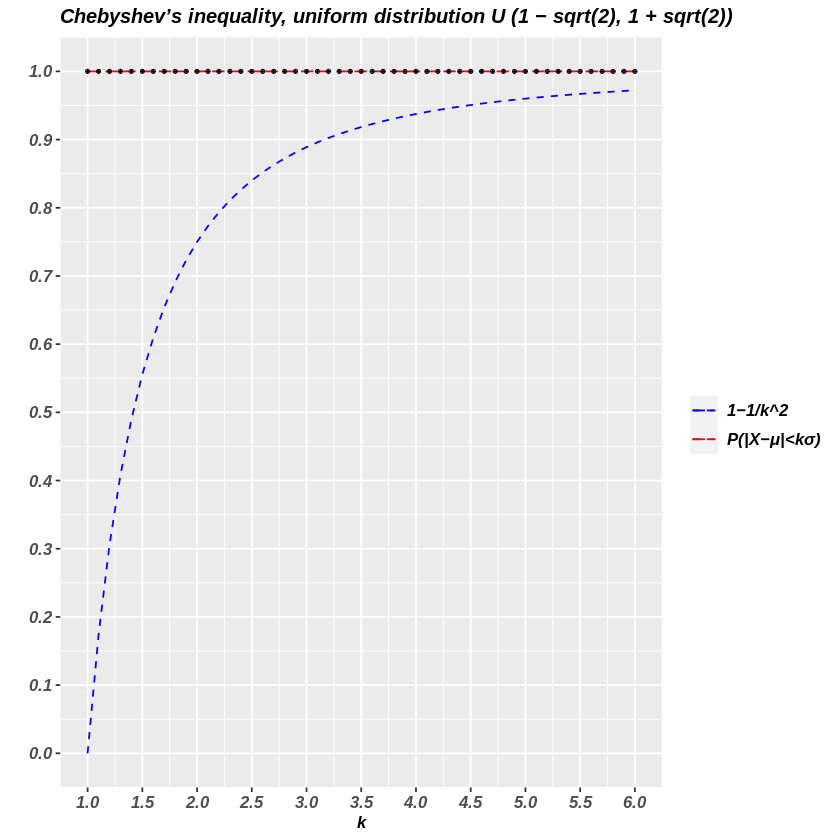

In [16]:
a<-1-sqrt(2)
b<-1+sqrt(2)

mu<-(a+b)/2
sig<-(b-a)/sqrt(12)

k<-seq(1,6,0.1)

p_vector<-c()

for (i in 1:length(k)) {
  p<-punif(k[i]*sig+mu,lambda)-punif(-k[i]*sig+mu,lambda)
  p_vector<-append(p_vector,p)
}

chabyshev_inf<-function(k) (1-1/(k*k))

ggplot(,aes(k,p_vector))+
  geom_line(data = data.frame(x=k,y=p_vector),aes(x = x, y=y, colour="P(|X−μ|<kσ)"), linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=chabyshev_inf(k)),aes(x = x, y=y,colour="1−1/k^2"), linetype="dashed")+
  ggtitle('Chebyshev’s inequality, uniform distribution U (1 − sqrt(2), 1 + sqrt(2))')+
  scale_x_continuous(breaks=seq(0.5,6,0.5))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("1−1/k^2" = "blue", "P(|X−μ|<kσ)"="red"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=10), legend.text = element_text(face="bold.italic",size = 10))

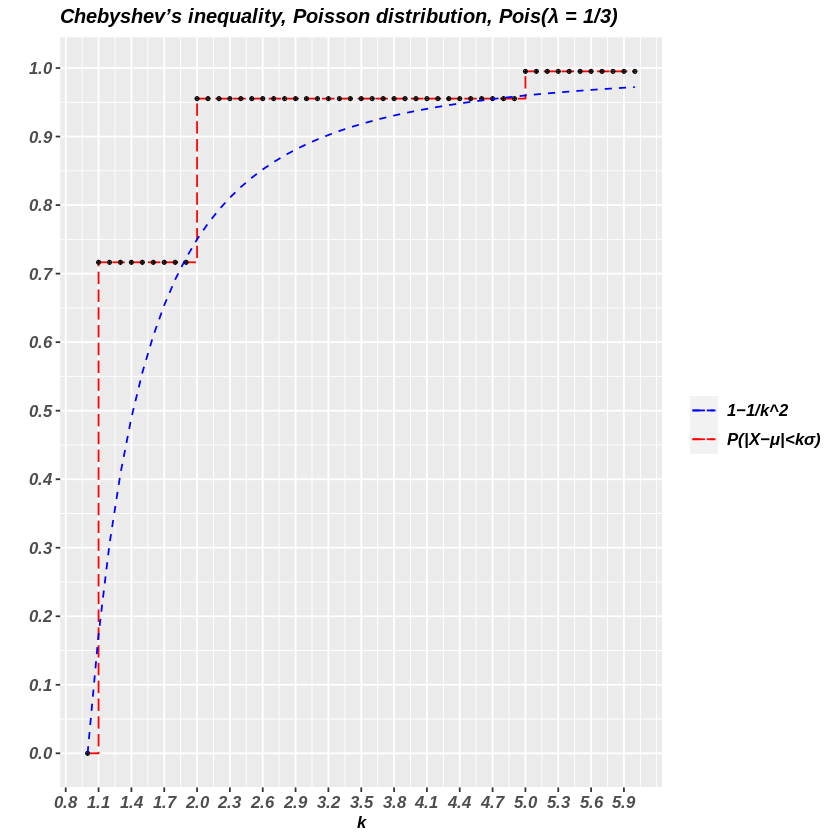

In [17]:
lambda<-1/3
mu<-lambda
sig<-lambda

k<-seq(1,6,0.1)

p_vector<-c()

for (i in 1:length(k)) {
  p<-ppois(k[i]*sig+mu,lambda)-ppois(-k[i]*sig+mu,lambda)
  p_vector<-append(p_vector,p)
}

chabyshev_inf<-function(k) (1-1/(k*k))

ggplot(,aes(k,p_vector))+
  geom_step(data = data.frame(x=k,y=p_vector),aes(x = x, y=y, colour="P(|X−μ|<kσ)"), linetype=5)+
  geom_point(col='black',size=0.75,shape=10)+
  geom_line(data=data.frame(x=k,y=chabyshev_inf(k)),aes(x = x, y=y,colour="1−1/k^2"), linetype="dashed")+
  ggtitle('Chebyshev’s inequality, Poisson distribution, Pois(λ = 1/3)')+
  scale_x_continuous(breaks=seq(0.5,6,0.3))+
  scale_y_continuous(name="",breaks=seq(0,1, 0.1),)+
  scale_colour_manual(name="",values=c("1−1/k^2" = "blue", "P(|X−μ|<kσ)"="red"))+
  theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y = element_text(face="bold.italic", size=10), title = element_text(face="bold.italic", size=10), legend.text = element_text(face="bold.italic",size = 10))

#Exercise 4

Inorder to show the results obtained I use a dataframe. The columns of
it are the following: 1) trial number 2) colour of the ball 3)
probability that the ball comes from the box 1 4) probability that the
ball comes from the box 2 5) probability that the ball comes from the
box 3 6) probability that the ball comes from the box 4 7) probability
that the ball comes from the box 5 8) probability to get a Black ball 9)
probability to get

At each iteration the user inserts the colour of the ball. Than using
the theoretical formulas I calculate the normalization. Finally I can
calculate the probability associated to each box.

In [18]:
p_h<-c(1/6,1/6,1/6,1/6,1/6,1/6)
j<-0
N<-0
P_b<-0
P_w<-0

six_box_df<-data.frame(trial=0,color="-",H0=round(p_h[1],3),H1=round(p_h[2],3),H2=round(p_h[3],3),H3=round(p_h[4],3),H4=round(p_h[5],3),H5=round(p_h[6],3),Pb=0.5,Pw=0.5)

while(1>0) {
  
  writeLines(" ")
  col=readline(prompt = "Enter B(black) or W(white)(Anything else to stop): ")
  
  if (col!="B" && col!="W"){
    print('bye bye')
    break
  }
  
  j<-j+1
  
  if(col=="B"){
    for (i in 0:5) {
      k<-i+1
      p_b<-((5-i)/5)
      N<-N+(p_b*p_h[k])
    } 
    
  } else if(col== "W"){
    for (i in 0:5) {
      k<-i+1
      p_b<-i/5
      N<-N+p_b*p_h[k]
    }
      
  }

  
  if(col=="B"){
    for (i in 0:5) {
      k<-i+1
      p_b<-((5-i)/5)
      p_h_i<-p_b*p_h[k]/N
      p_h[k]<-p_h_i
      
    } 
    
  } else if(col=="W"){
    
      for (i in 0:5) {
       k<-i+1
       p_b<-(i/5)
       p_h_i<-p_b*p_h[k]/N
      
       p_h[k]<-p_h_i
       
    } 
      
  }
  
  if(col=="B"){
    for (i in 0:5) {
      
      k<-i+1
      p_b<-((5-i)/5)
      P_b<-P_b+p_b*p_h[k]
      
    }
    
    P_w<-1-P_b
    
  }
  
  if(col=="W"){
    for (i in 0:5) {
      
      k<-i+1
      p_w<-((i)/5)
      P_w<-P_w+p_w*p_h[k]
      
    }
    
    P_b<-1-P_w
    
  }
  
  
  six_box_df[nrow(six_box_df)+1,] = c(j,col,round(p_h[1],3),round(p_h[2],3),round(p_h[3],3),round(p_h[4],3),round(p_h[5],3),round(p_h[6],3),Pb=round(P_b,3),Pw=round(P_w,3))
  
  N<-0
  P_b<-0
  P_w<-0
  
  
}

Enter B(black) or W(white)(Anything else to stop): B
Enter B(black) or W(white)(Anything else to stop): B
Enter B(black) or W(white)(Anything else to stop): W
Enter B(black) or W(white)(Anything else to stop): W
Enter B(black) or W(white)(Anything else to stop): W
Enter B(black) or W(white)(Anything else to stop): B
Enter B(black) or W(white)(Anything else to stop): W
Enter B(black) or W(white)(Anything else to stop): B
Enter B(black) or W(white)(Anything else to stop): B
Enter B(black) or W(white)(Anything else to stop): W
Enter B(black) or W(white)(Anything else to stop): r
 
 
 
 
 
 
 
 
 
 
 
[1] "bye bye"


Lets show the results.

In [19]:
six_box_df

,trial,color,H0,H1,H2,H3,H4,H5,Pb,Pw
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,-,0.167,0.167,0.167,0.167,0.167,0.167,0.5,0.5
2,1,B,0.333,0.267,0.2,0.133,0.067,0,0.733,0.267
3,2,B,0.455,0.291,0.164,0.073,0.018,0,0.818,0.182
4,3,W,0,0.32,0.36,0.24,0.08,0,0.584,0.416
5,4,W,0,0.154,0.346,0.346,0.154,0,0.5,0.5
6,5,W,0,0.062,0.277,0.415,0.246,0,0.431,0.569
7,6,B,0,0.114,0.386,0.386,0.114,0,0.5,0.5
8,7,W,0,0.046,0.309,0.463,0.183,0,0.443,0.557
9,8,B,0,0.082,0.418,0.418,0.082,0,0.5,0.5


Lets plot the results.

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


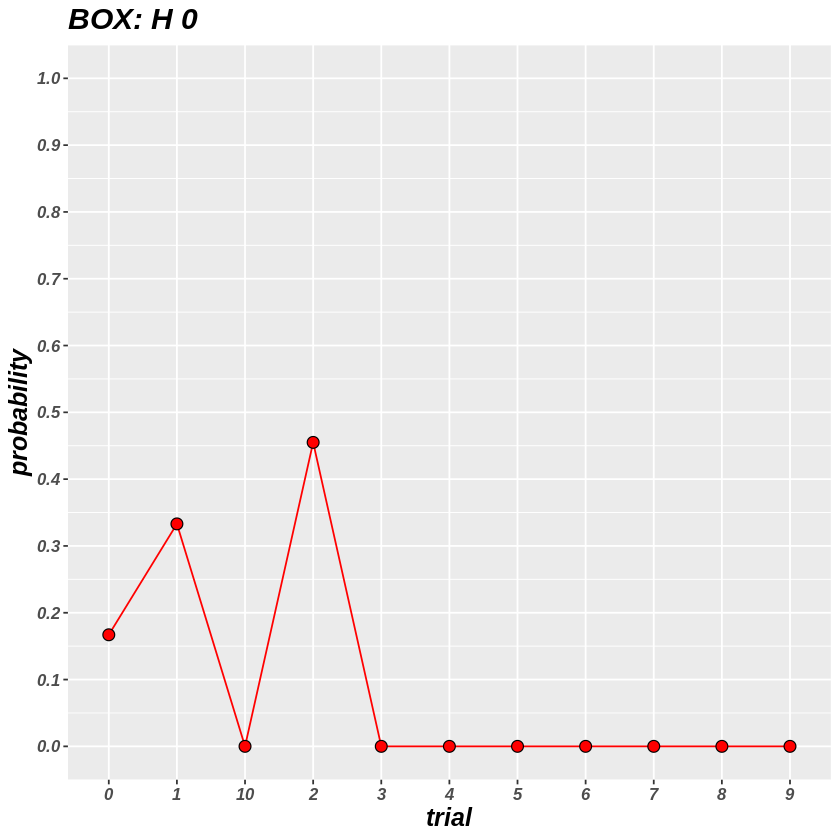

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


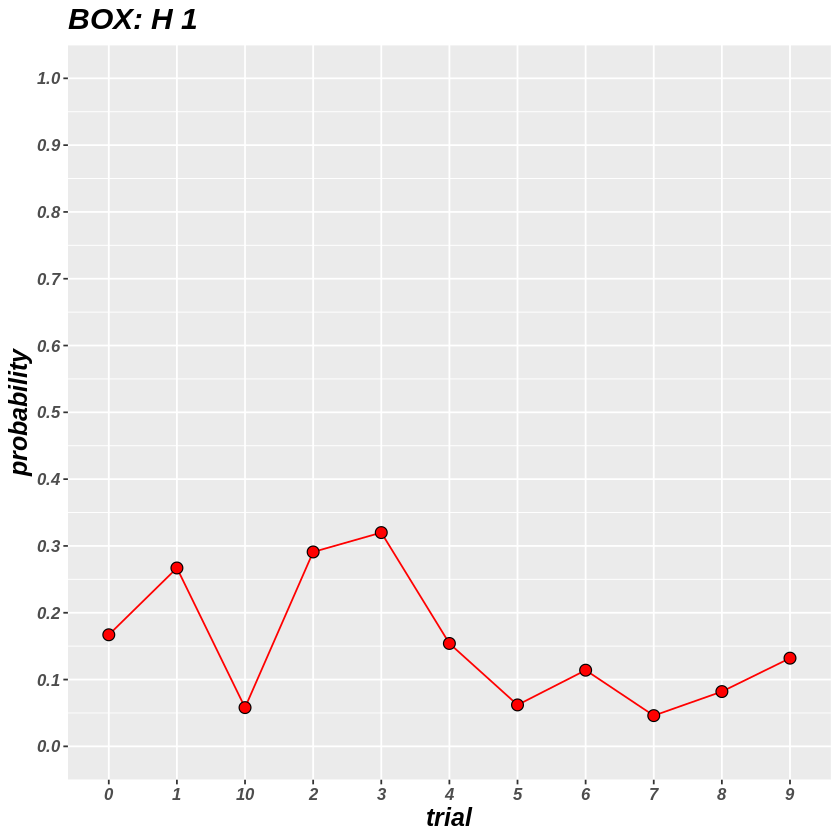

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


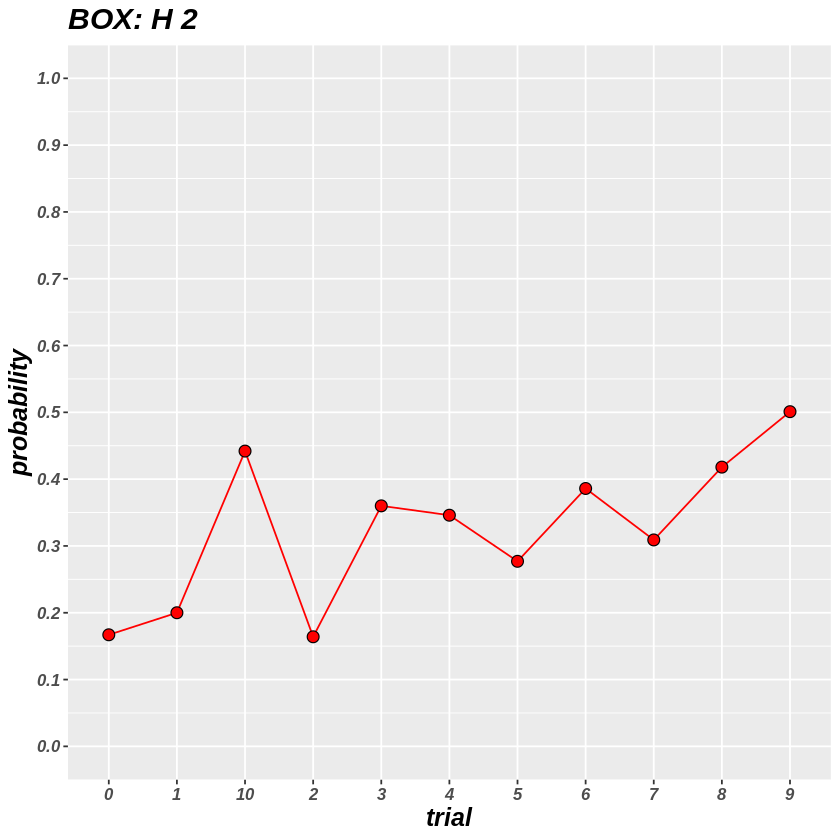

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


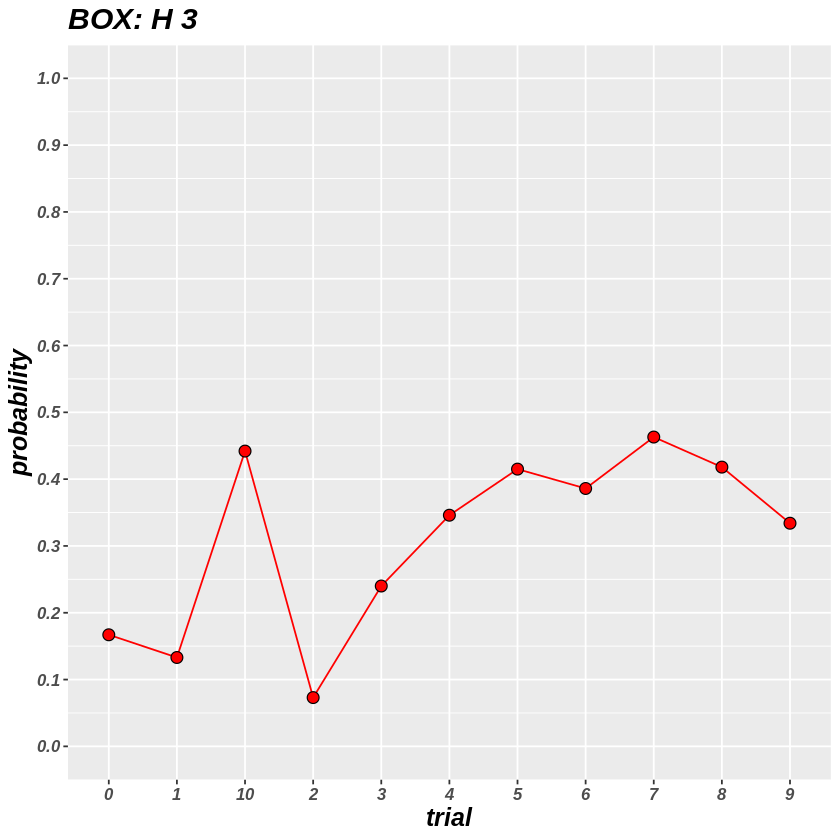

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


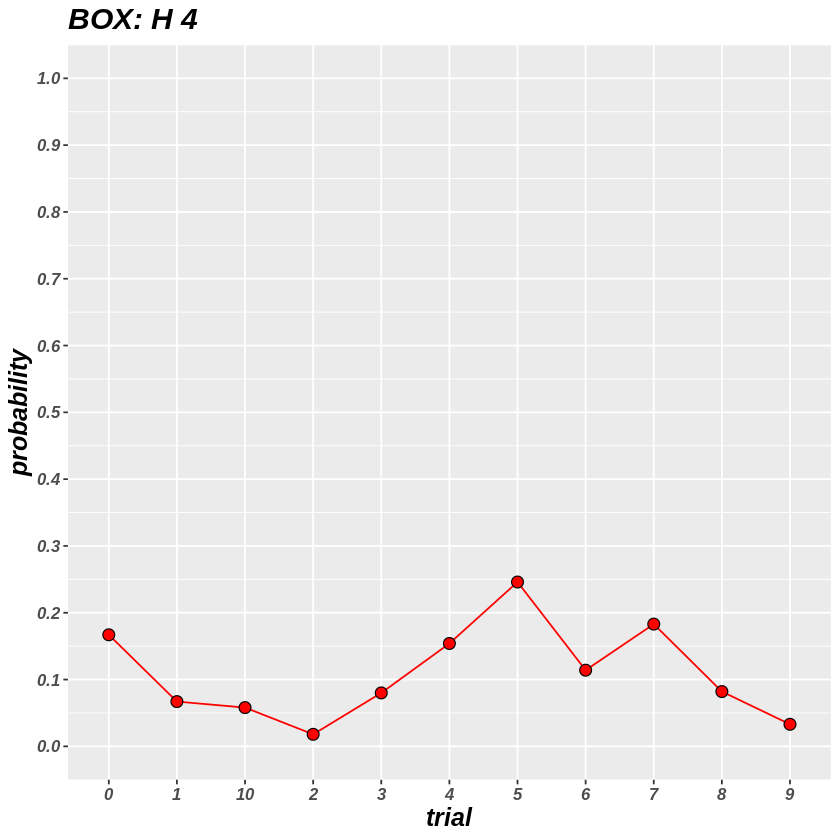

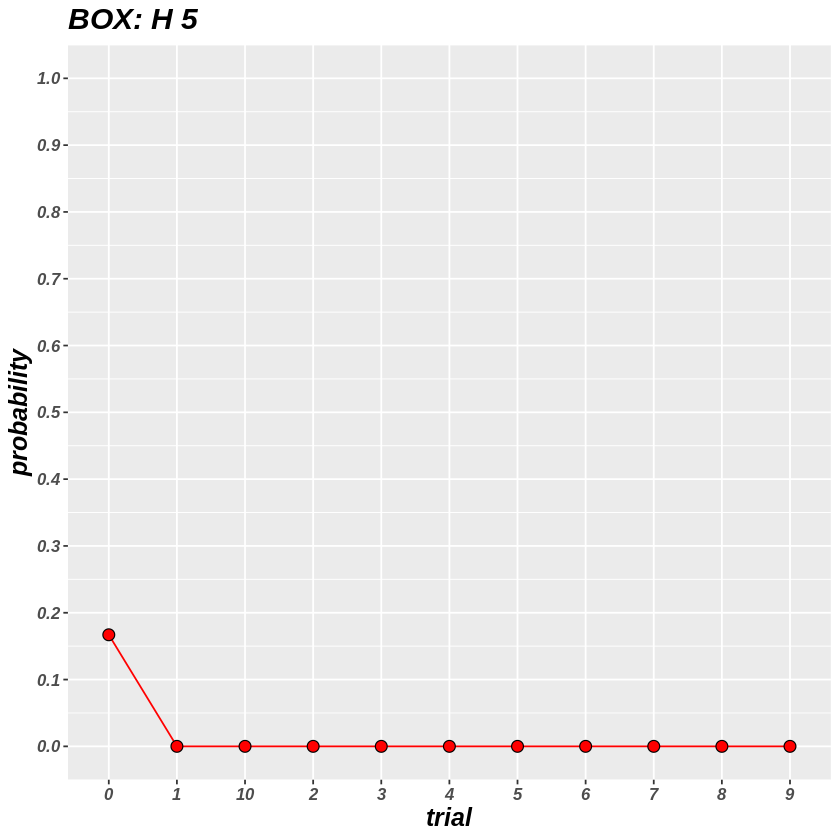

In [20]:
plt_prob<-function(x){

  for (i in 3:8) {
    
    y<-as.numeric(x[,i])
    title<-paste("BOX: H",as.character(i-3))
    plt<-ggplot(x,aes(x$trial,y, group=1))+
      geom_line(colour="red")+
      geom_point(stat="identity",colour="black",pch=21, size=3, fill='red')+
      xlab("trial")+
      ylab("probability")+
      scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by=0.1))+
      theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y =
              element_text(face="bold.italic", size=10), title =
              element_text(face="bold.italic", size=15),
            legend.text=element_text(face="bold.italic",size = 15))+
      ggtitle(title)
    
    print(plt)
  }
  
}

plt_prob(six_box_df)

In [21]:
print(six_box_df$trial)
print(six_box_df$Pb)

 [1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"
 [1] "0.5"   "0.733" "0.818" "0.584" "0.5"   "0.431" "0.5"   "0.443" "0.5"  
[10] "0.546" "0.5"  


Warning message:
“Use of `six_box_df$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `six_box_df$Pb` is discouraged. Use `Pb` instead.”
Warning message:
“Use of `six_box_df$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `six_box_df$Pb` is discouraged. Use `Pb` instead.”


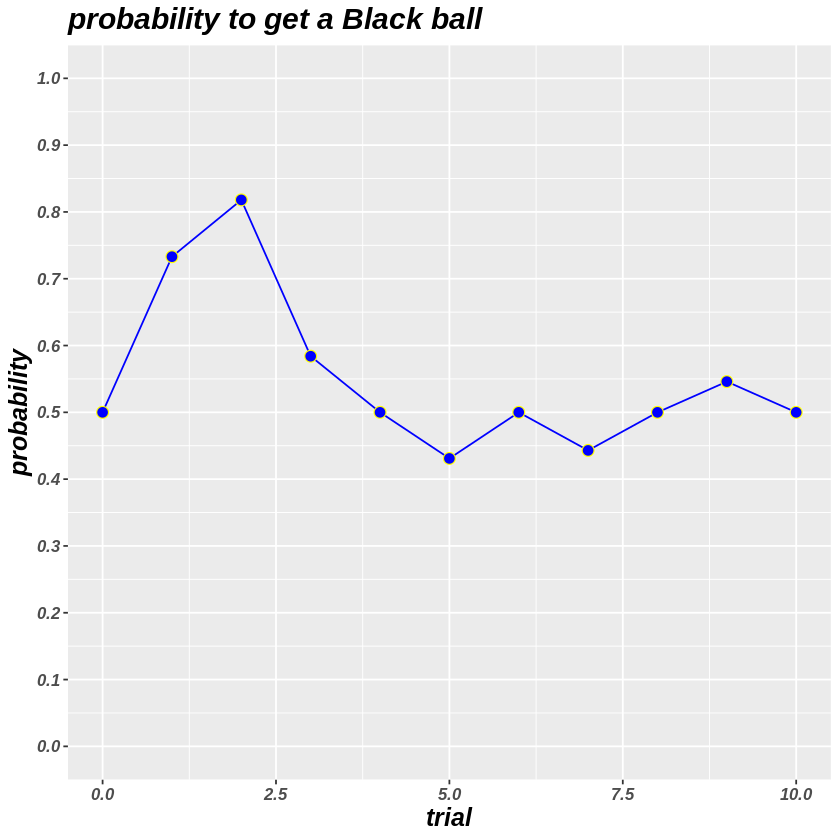

In [22]:
ggplot(six_box_df,aes(as.numeric(six_box_df$trial),as.numeric(six_box_df$Pb)))+
      geom_line(stat="identity",colour="blue")+
      geom_point(stat="identity",colour="yellow",pch=21, size=3, fill='blue')+
      xlab("trial")+
      ylab("probability")+
      ggtitle("probability to get a Black ball")+
      scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by=0.1))+
      theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y =
              element_text(face="bold.italic", size=10), 
            title =  element_text(face="bold.italic", size=15),
            legend.text=element_text(face="bold.italic",size = 15))

Warning message:
“Use of `six_box_df$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `six_box_df$Pw` is discouraged. Use `Pw` instead.”
Warning message:
“Use of `six_box_df$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `six_box_df$Pw` is discouraged. Use `Pw` instead.”


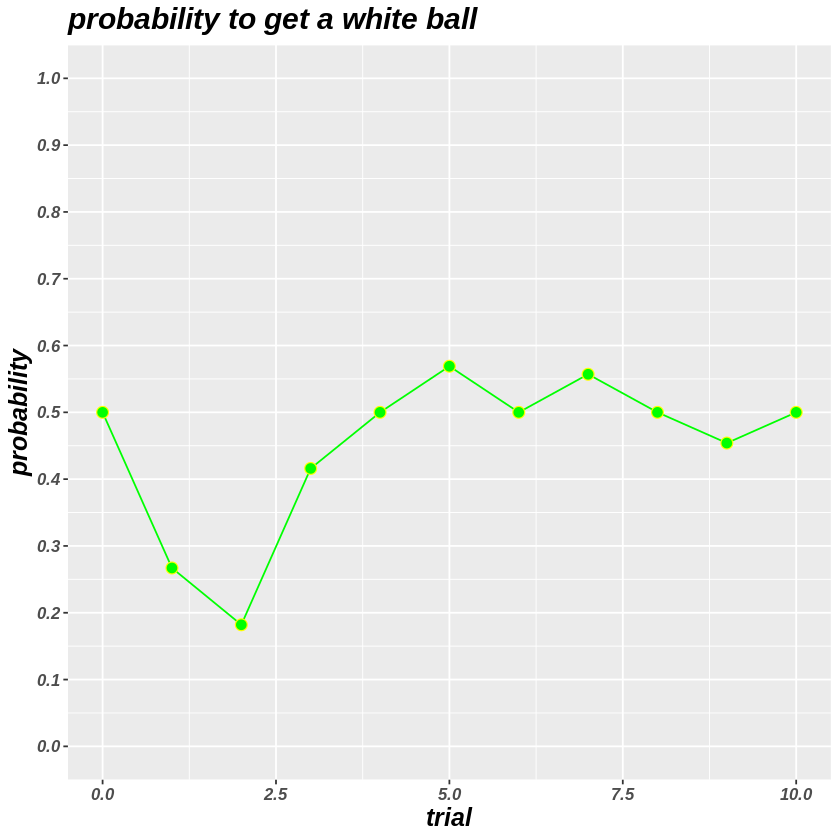

In [23]:
ggplot(six_box_df,aes(as.numeric(six_box_df$trial),as.numeric(six_box_df$Pw)))+
      geom_line(stat="identity",colour="green")+
      geom_point(stat="identity",colour="yellow",pch=21, size=3, fill='green')+
      xlab("trial")+
      ylab("probability")+
      ggtitle("probability to get a white ball")+
      scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by=0.1))+
      theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y =
              element_text(face="bold.italic", size=10), 
            title =  element_text(face="bold.italic", size=15),
            legend.text=element_text(face="bold.italic",size = 15))

#Exercise 6

Basically the results shown are the same of the previous exercise and
the process is almost the same. What changes is the fact that this is a
simulation so the user does not have to insert the colour of the ball
but just the number of extractions (iterations). For each iteration the
program selects a random box and from the box it randomly selects a ball
using the function sample(). To do that the boxes and the balls that
they contain are defined in a dataframe. At each iteration the program
selects a random number between 1 and 6 to select the box (the index of
the column) and a random number between 1 and 5 to select the ball (the
index of the row). Than a ball (an element of hte dtaframe) is selected.

In [24]:
boxes<-data.frame(H_0=c("B","B","B","B","B"),H_1=c("W","B","B","B","B"),H_2=c("W","W","B","B","B"),H_3=c("W","W","W","B","B"),H_4=c("W","W","W","W","B"),H_5=c("W","W","W","W","W"))

boxes

H_0,H_1,H_2,H_3,H_4,H_5
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
B,W,W,W,W,W
B,B,W,W,W,W
B,B,B,W,W,W
B,B,B,B,W,W
B,B,B,B,B,W


In [25]:
p_h<-c(1/6,1/6,1/6,1/6,1/6,1/6)
p_h_history<-list()
p_col_history<-list()
p_trial_history<-list()
j<-0
N<-0
P_b<-0
P_w<-0

prob_six_box_history<-data.frame(trial=0,color="-",H0=round(p_h[1],3),H1=round(p_h[2],3),H2=round(p_h[3],3),H3=round(p_h[4],3),H4=round(p_h[5],3),H5=round(p_h[6],3),Pb=0.5,Pw=0.5)
chosen_state_history<-data.frame(trial=0,box_index=NA,color=NA)
most_prob_box<-data.frame(trial=0,most_probable_box=NA,probability=NA)


n=readline(prompt = "how many samples: ")

for (i in 1:n){
  
  
  c<-sample(1:6,1)
  r<-sample(1:5,1)
  
  cat("box chosen ",c)
  cat("\n")
  cat("ball chosen ",r)
  cat("\n")
  col<-boxes[r,c]
  cat("color of the ball ",col)
  cat("\n")
  cat("\n")
  
  
  p_col_history<-append(p_col_history,col)
  p_trial_history<-append(p_trial_history,j)
  j<-j+1
  
  if(col=="B"){
    for (i in 0:5) {
      k<-i+1
      p_b<-((5-i)/5)
      N<-N+(p_b*p_h[k])
    } 
    
  } else if(col== "W"){
    for (i in 0:5) {
      k<-i+1
      p_b<-i/5
      N<-N+p_b*p_h[k]
  
    }
      
  }

  if(col=="B"){
    for (i in 0:5) {
      k<-i+1
      p_b<-((5-i)/5)
      p_h_i<-p_b*p_h[k]/N
      p_h[k]<-p_h_i
      
    } 
    
  } else if(col=="W"){
    
      for (i in 0:5) {
       k<-i+1
       p_b<-(i/5)
       p_h_i<-p_b*p_h[k]/N
      
       p_h[k]<-p_h_i
       
    } 
      
  }
  
  if(col=="B"){
    for (i in 0:5) {
      
      k<-i+1
      p_b<-((5-i)/5)
      P_b<-P_b+p_b*p_h[k]
      
    }
    
    P_w<-1-P_b
    
  }
  
  if(col=="W"){
    for (i in 0:5) {
      
      k<-i+1
      p_w<-((i)/5)
      P_w<-P_w+p_w*p_h[k]
      
    }
    
    P_b<-1-P_w
    
  }
  
  prob_six_box_history[nrow(prob_six_box_history)+1,]=c(j,col,round(p_h[1],3),round(p_h[2],3),round(p_h[3],3),round(p_h[4],3),round(p_h[5],3),round(p_h[6],3),Pb=round(P_b,3),Pw=round(P_w,3))
  
  ind<-which(p_h==max(p_h))[1]
  most_p_h<-p_h[ind]
  most_prob_box[nrow(most_prob_box)+1,]=c(j,ind-1,round(most_p_h,3))
  
  chosen_state_history[nrow(chosen_state_history)+1,]=c(j,c-1,col)
  
  N<-0
  P_b<-0
  P_w<-0
  
}

how many samples: 5
box chosen  2
ball chosen  2
color of the ball  B

box chosen  2
ball chosen  2
color of the ball  B

box chosen  5
ball chosen  4
color of the ball  W

box chosen  1
ball chosen  3
color of the ball  B

box chosen  5
ball chosen  3
color of the ball  W



    ## Error in 1:n: Argomento NA/NaN

In [26]:
print("stop")

[1] "stop"


In [27]:
chosen_state_history

,trial,box_index,color
,<chr>,<chr>,<chr>
1,0,NA,NA
2,1,1,B
3,2,1,B
4,3,4,W
5,4,0,B
6,5,4,W


In [28]:
most_prob_box

,trial,most_probable_box,probability
,<dbl>,<dbl>,<dbl>
1,0,NA,NA
2,1,0,0.333
3,2,0,0.455
4,3,2,0.360
5,4,1,0.438
6,5,2,0.415


In [29]:
prob_six_box_history

,trial,color,H0,H1,H2,H3,H4,H5,Pb,Pw
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,-,0.167,0.167,0.167,0.167,0.167,0.167,0.5,0.5
2,1,B,0.333,0.267,0.2,0.133,0.067,0,0.733,0.267
3,2,B,0.455,0.291,0.164,0.073,0.018,0,0.818,0.182
4,3,W,0,0.32,0.36,0.24,0.08,0,0.584,0.416
5,4,B,0,0.438,0.37,0.164,0.027,0,0.644,0.356
6,5,W,0,0.246,0.415,0.277,0.062,0,0.569,0.431


Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


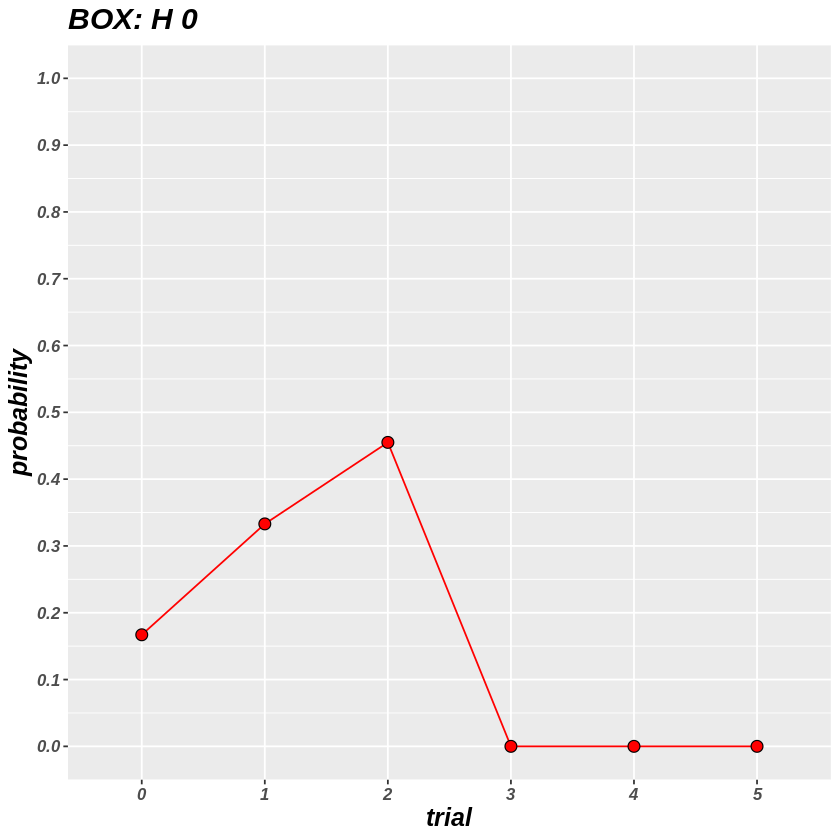

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


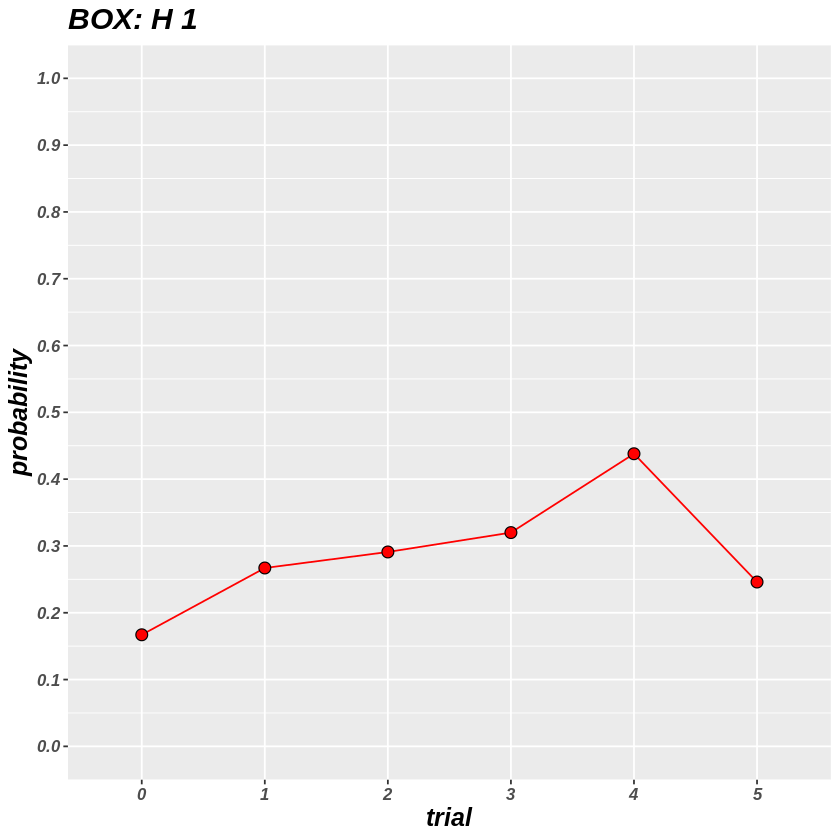

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


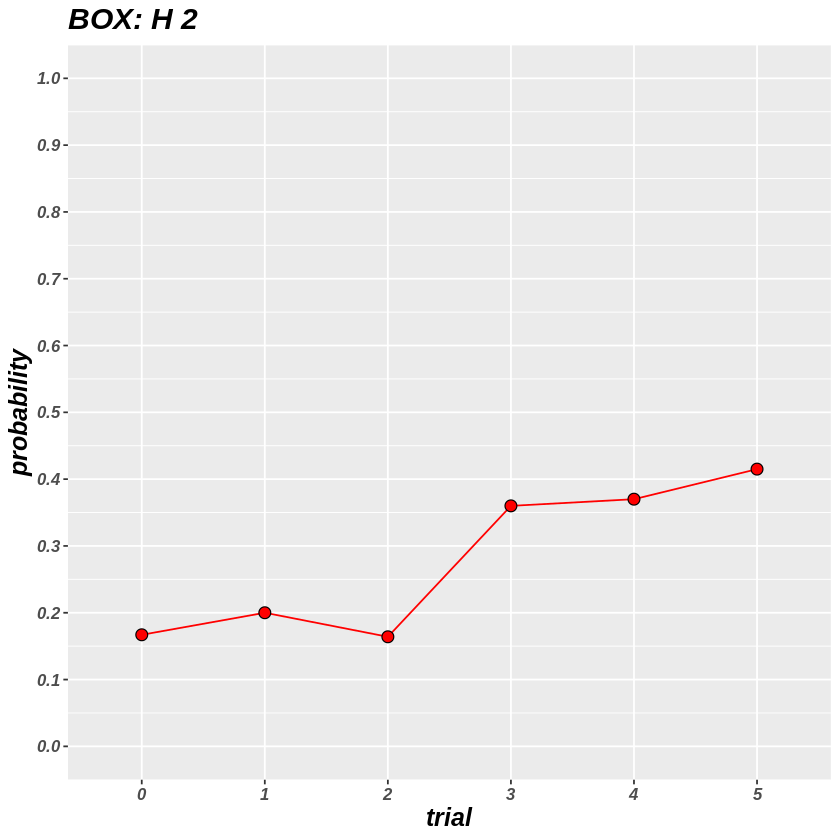

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


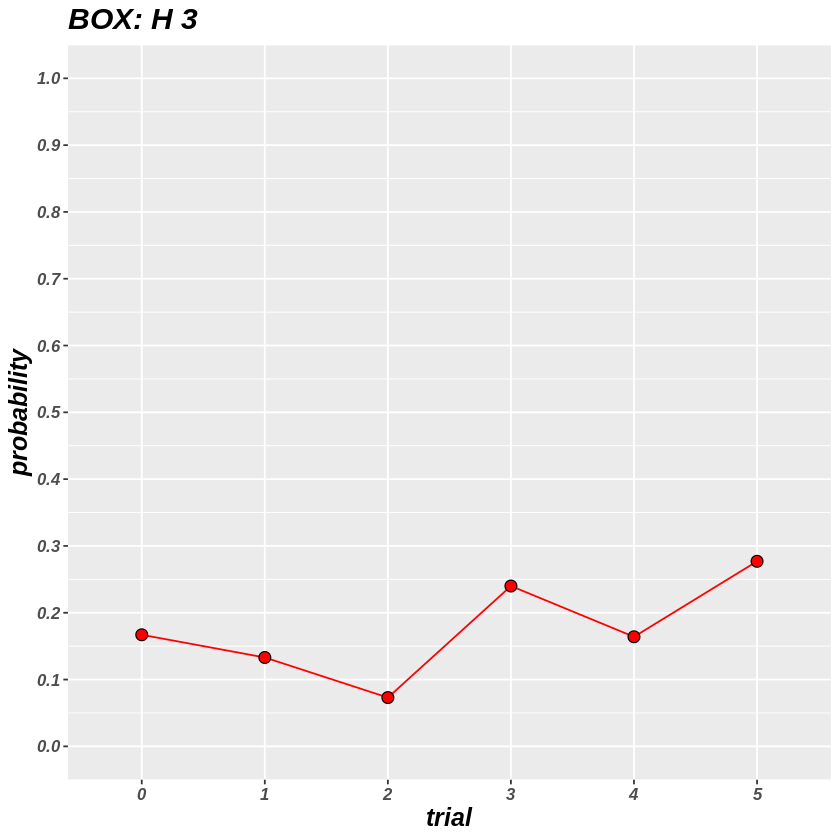

Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `x$trial` is discouraged. Use `trial` instead.”


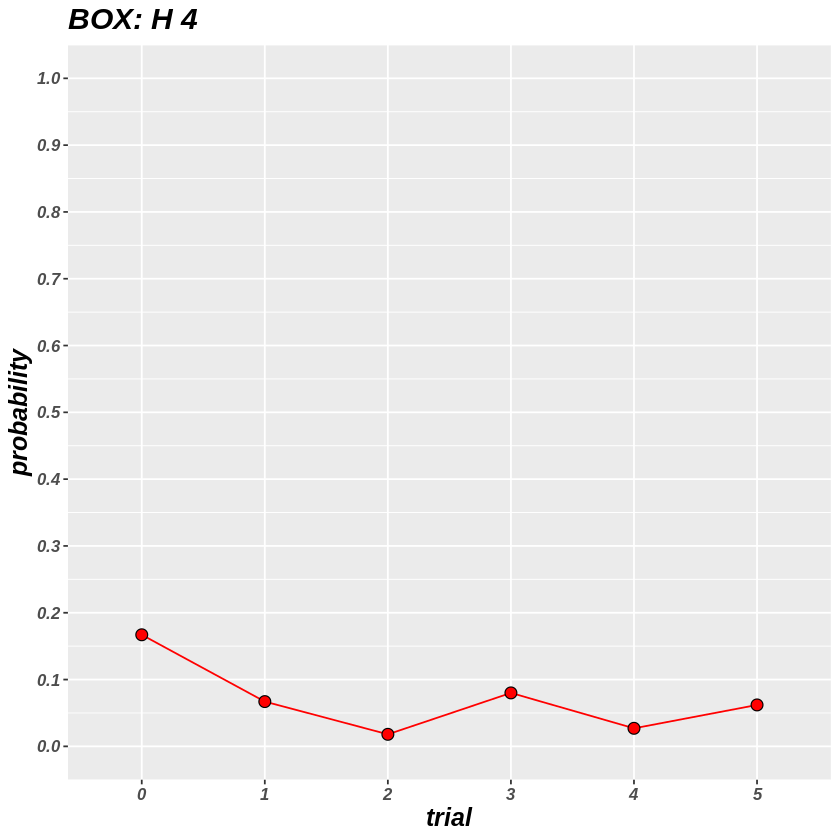

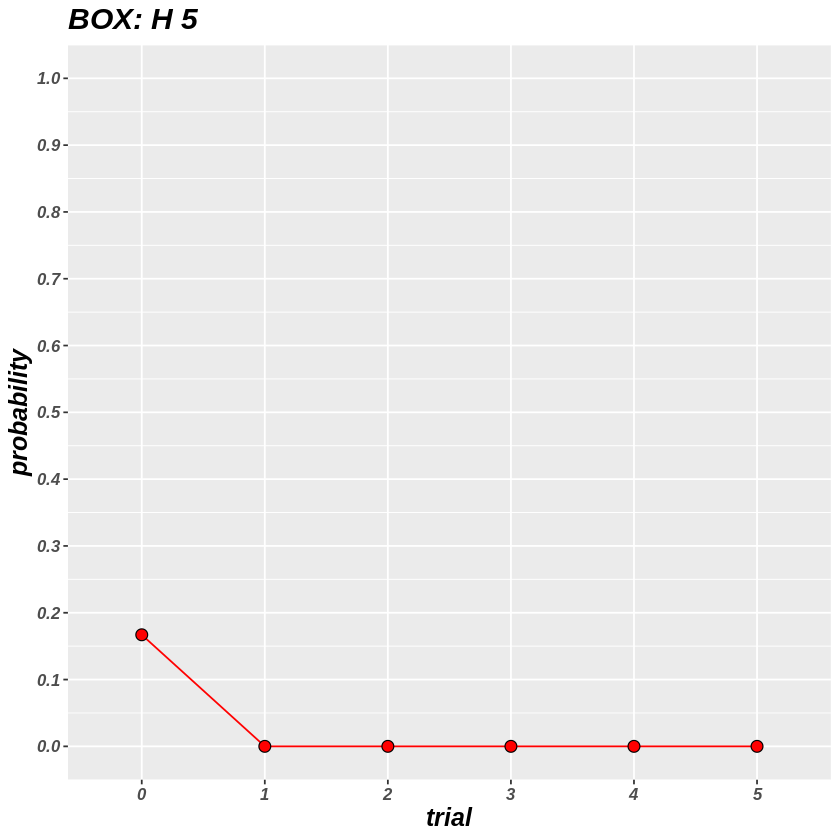

In [30]:
plt_prob<-function(x){

  for (i in 3:8) {
    
    y<-as.numeric(x[,i])
    title<-paste("BOX: H",as.character(i-3))
    plt<-ggplot(x,aes(x$trial,y, group=1))+
      geom_line(colour="red")+
      geom_point(stat="identity",colour="black",pch=21, size=3, fill='red')+
      xlab("trial")+
      ylab("probability")+
      scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by=0.1))+
      theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y =
              element_text(face="bold.italic", size=10), title =
              element_text(face="bold.italic", size=15),
            legend.text=element_text(face="bold.italic",size = 15))+
      ggtitle(title)
    
    print(plt)
  }
  
}

plt_prob(prob_six_box_history)

Warning message:
“Use of `prob_six_box_history$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `prob_six_box_history$Pb` is discouraged. Use `Pb` instead.”
Warning message:
“Use of `prob_six_box_history$trial` is discouraged. Use `trial` instead.”
Warning message:
“Use of `prob_six_box_history$Pb` is discouraged. Use `Pb` instead.”


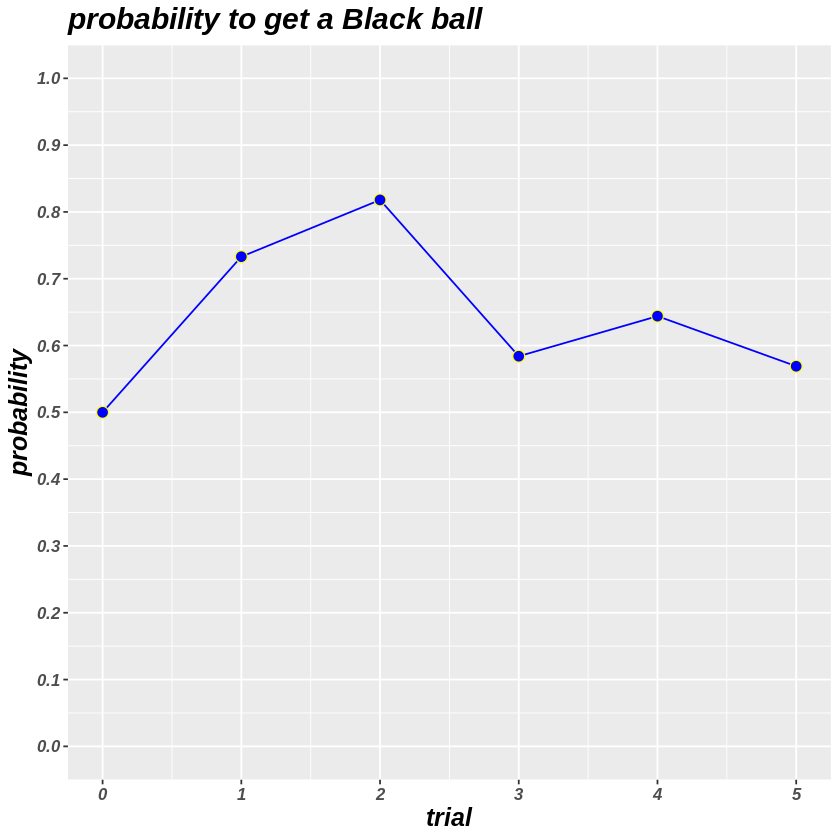

In [31]:
ggplot(prob_six_box_history,aes(as.numeric(prob_six_box_history$trial),as.numeric(prob_six_box_history$Pb),group = 1))+
      geom_line(stat="identity",colour="blue")+
      geom_point(stat="identity",colour="yellow",pch=21, size=3, fill='blue')+
      xlab("trial")+
      ylab("probability")+
      ggtitle("probability to get a Black ball")+
      scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, by=0.1))+
      theme(axis.text.x = element_text(face="bold.italic", size=10), axis.text.y =
              element_text(face="bold.italic", size=10), 
            title =  element_text(face="bold.italic", size=15),
            legend.text=element_text(face="bold.italic",size = 15))